In [1]:
## Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import logging

import os, glob, sys
from utils.logutils import load_log
from utils.logutils import splitall

# set inline print
%matplotlib inline

logging.basicConfig(filename='analysis_complete.log', level=logging.INFO)

In [2]:
ltsdiff_tab = "./comparisons.csv"
df_diff = pd.read_csv(ltsdiff_tab)
logging.info('ltsdiff.tab loaded: Number of entries = '+str(len(df_diff)))

df_diff.describe()

,Precision,Recall,F-measure
count,540.000000,540.000000,540.000000
mean,0.664424,0.641082,0.638324
std,0.231722,0.235316,0.220243
min,0.072600,0.072261,0.115028
25%,0.500000,0.468750,0.491904
50%,0.732026,0.693878,0.702068
75%,0.857143,0.842857,0.800000
max,1.000000,1.000000,1.000000


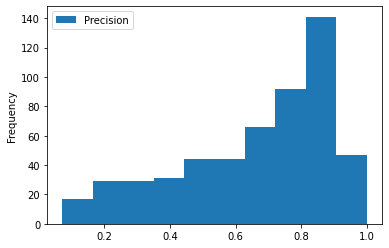

In [3]:
df_aux = df_diff

ax = df_aux.plot(y='Precision', kind = 'hist')
plt.rcParams["figure.figsize"] = (10,3)
plt.show()

In [4]:
rootdir = os.path.join("..","results","run_20210708_130230_814929500")

# lst_logs = []
# for a_dir in glob.glob(rootdir+'/*/*/*/*'):
#     _,_,_,rep,subject,sul,method = splitall(a_dir)
#     if(method in ["lstar", "l1"]):
#         a_log = os.listdir(os.path.join(rootdir, rep,subject,sul,method))[0]
#         path_log = os.path.join(rootdir,rep,subject,sul,method,a_log)
#         lst_logs.append(load_log(path_log))
#         logging.info('Loading log: '+path_log)
#     else:
#         for reused in os.listdir(os.path.join(rootdir, rep,subject,sul,method)):
#             a_log = os.listdir(os.path.join(rootdir, rep,subject,sul,method,reused))[0]
#             path_log = os.path.join(rootdir,rep,subject,sul,method,reused,a_log)
#             lst_logs.append(load_log(path_log))
#             logging.info('Loading log: '+path_log)
# 
# lst_iters = []
# lst_subjs = []
# for i in lst_logs:
#     logging.info('Parsing log: '+",".join([str(i.Method),str(i.SUL),str(i.ReusedOT),str(i.Seed)]))
#     lst_iters.append(pd.DataFrame(i.Iterations))
#     lst_subjs.append(
#         pd.DataFrame(
#             {
#                 "Method" : [i.Method],
#                 "SUL" : [i.SUL],
#                 "ReusedOT" : [i.ReusedOT],
#                 "Seed" : [i.Seed],
#                 "Cache" : [i.Cache],
#                 "ClosingStrategy" : [i.ClosingStrategy],
#                 "ObservationTableCEXHandler" : [i.ObservationTableCEXHandler],
#                 "EquivalenceOracle" : [i.EquivalenceOracle],
#                 "Rounds" : [i.Rounds],
#                 "MQ_Resets" : [i.MQ_Resets],
#                 "MQ_Symbols" : [i.MQ_Symbols],
#                 "EQ_Resets" : [i.EQ_Resets],
#                 "EQ_Symbols" : [i.EQ_Symbols],
#                 "Learning_ms" : [i.Learning_ms],
#                 "Searching_for_CE" : [i.Searching_for_CE],
#                 "Qsize" : [i.Qsize],
#                 "Isize" : [i.Isize],
#                 "Equivalent" : [i.Equivalent],
#                 "Info" : [i.Info]
#             }
#         )
#     )

# df_iters = pd.concat(lst_iters).reset_index(drop=True)
# df_subjs = pd.concat(lst_subjs).reset_index(drop=True)

# df_iters.to_csv('stats_iter.csv', index=False)
# df_subjs.to_csv( 'stats_subj.csv', index=False)

In [5]:
df_iters = pd.read_csv("stats_iter.csv")
df_iters.head(100)

,Method,SUL,ReusedOT,Seed,Round,HypothesisSize,SULSize
0,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss.ot,1625742157167,1,11,11
1,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,1,5,11
2,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,2,6,11
3,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,3,8,11
4,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,4,10,11
...,...,...,...,...,...,...,...
95,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,NaN,1625742153725,3,12,22
96,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,NaN,1625742153725,4,15,22
97,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,NaN,1625742153725,5,17,22
98,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,NaN,1625742153725,6,19,22


In [7]:
df_subjs = pd.read_csv("stats_subj.csv")
df_subjs.query('Equivalent=="NOK"')

,Method,SUL,ReusedOT,Seed,Cache,ClosingStrategy,ObservationTableCEXHandler,EquivalenceOracle,Rounds,MQ_Resets,MQ_Symbols,EQ_Resets,EQ_Symbols,Learning_ms,Searching_for_CE,Qsize,Isize,Equivalent,Info
1581,DL*M_v2,BitVise.dot.kiss.kiss,BitVise.dot.kiss.ot,1625745333956,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),7,18303,204308,675566,7462393,4964,26502,66,13,NOK,rep=1
1638,DL*M_v2,TCP_Linux_Server.dot.kiss.kiss,TCP_Linux_Server.dot.kiss.ot,1625746160276,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),10,13379,141082,505483,5473729,3651,28066,57,12,NOK,rep=1
1652,DL*M_v2,TCP_Windows8_Server.dot.kiss.kiss,TCP_Linux_Server.dot.kiss.ot,1625746169681,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),7,8822,71655,453136,4247587,4786,22402,38,13,NOK,rep=1
1656,Adaptive,GnuTLS_3.3.12_server_regular.dot.kiss.kiss,GnuTLS_3.3.12_server_regular.dot.kiss.ot,1625747443703,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),1,72,136,584,1672,10,89,7,8,NOK,rep=1
1657,Adaptive,GnuTLS_3.3.12_server_regular.dot.kiss.kiss,GnuTLS_3.3.8_server_regular.dot.kiss.ot,1625747540153,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),1,72,136,584,1672,7,56,7,8,NOK,rep=1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203035,DL*M_v2,RSA_BSAFE_Java_6.1.1_server_regular.dot.kiss.kiss,OpenSSL_1.0.2_server_regular.dot.kiss.ot,1626302086794,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),1,63,119,584,1672,7,46,5,8,NOK,rep=90
203036,DL*M_v2,RSA_BSAFE_Java_6.1.1_server_regular.dot.kiss.kiss,RSA_BSAFE_C_4.0.4_server_regular.dot.kiss.ot,1626302183401,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),1,80,169,584,1672,10,43,5,8,NOK,rep=90
203037,DL*M_v2,RSA_BSAFE_Java_6.1.1_server_regular.dot.kiss.kiss,RSA_BSAFE_Java_6.1.1_server_regular.dot.kiss.ot,1626302279950,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),1,72,136,584,1672,7,46,5,8,NOK,rep=90
203038,L1,RSA_BSAFE_Java_6.1.1_server_regular.dot.kiss.kiss,NaN,1626301225153,Y,CloseFirst,RivestSchapire,WpMethodHypEQOracle(2),1,8,8,584,1672,2,60,5,8,NOK,NaN
